# Universidad de Los Andes
## PROYECTO:BNP Paribas Cardif Claims Management
##  
Blanca Ubaque - 201725992

Carolina Trespalacios - 200313688

Santiago Barco - 200913781

Rafael Niño - 200522388 

 **Se realizará la corrida de los siguientes modelos para la predicción:**

# Modelo Logit

In [2]:
# Instalación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
# Lectura de la data en X
X_train = pd.read_csv('X_dtrain.csv', sep=',',na_values=[''],header=0)
X_test = pd.read_csv('X_dtest.csv', sep=',',na_values=[''],header=0)

In [4]:
# Lectura de la data en X
y_train = pd.read_csv('y_dtrain.csv', sep=',',na_values=[''],header=0)
y_test = pd.read_csv('y_dtest.csv', sep=',',na_values=[''],header=0)

Se procede a eliminar la variable *'Unnamed: 0'* que fue utilizada en el ETL para la identificación de valores faltantes NAs

In [5]:
X_train.drop('Unnamed: 0', inplace=True, axis=1)
X_test.drop('Unnamed: 0', inplace=True, axis=1)
y_train.drop('Unnamed: 0', inplace=True, axis=1)
y_test.drop('Unnamed: 0', inplace=True, axis=1)

Se partira del dataframe de **Train** para el desarrollo del modelo de Regresion Logistica apoyado den la libreria **sklearn**

## Modelo 1 - Logit

In [6]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Luego de correr el modelo se procedera con la prediccion del mismo utilizando el dataframe seleccionado para **Test**

In [7]:
# predict probability of survival
y_pred_pro= logreg.predict_proba(X_test)

In [8]:
y_pred_pro

array([[ 0.325487  ,  0.674513  ],
       [ 0.25863709,  0.74136291],
       [ 0.22786395,  0.77213605],
       ..., 
       [ 0.26668684,  0.73331316],
       [ 0.39410051,  0.60589949],
       [ 0.2227972 ,  0.7772028 ]])

In [9]:
# make predictions for testing set
y_pred = logreg.predict(X_test)

In [10]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
# calculate testing accuracy
from sklearn import metrics
acc_LR1=metrics.accuracy_score(y_test, y_pred)
print(acc_LR1)

0.767589627028


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Text(0,0.5,'True Positive Rate (Sensitivity)')

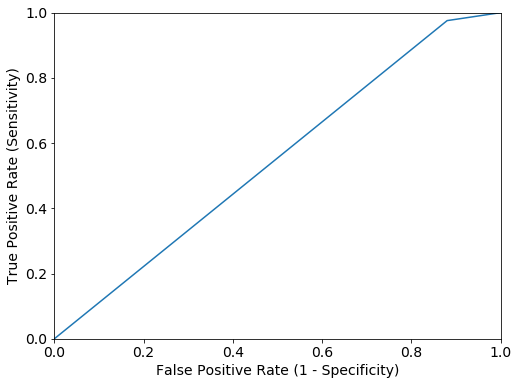

In [13]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [14]:
# calculate AUC
AUC_LR1=metrics.roc_auc_score(y_test, y_pred)
print(AUC_LR1)

0.54781298704


Debido a que el modelo no tiene un rendimiendo al parecer bueno, se realizara la corrida de un modelo luego de haber realizado seleccion de variables a partir de un **Stepwise**

In [15]:
xnew1=['v50','v47_C','v66_C','v110_B','v66_B','v14','v66_A','v24_E','v79_O',
         'v119','v31_C','v24_C','v79_J','v47_E','v79_D','v47_D','v112_F','v74_C','v79_A','v31_B']

X1train= X_train[xnew1]

In [16]:
X1train

,v50,v47_C,v66_C,v110_B,v66_B,v14,v66_A,v24_E,v79_O,v119,v31_C,v24_C,v79_J,v47_E,v79_D,v47_D,v112_F,v74_C,v79_A,v31_B
0,2.139241,1,0,1,0,11.524170,1,1,0,-7.054842e-07,0,0,0,0,0,0,0,0,0,0
1,1.974911,1,0,1,0,11.648955,1,0,0,7.861827e-01,0,0,0,0,0,0,0,0,0,0
2,0.959577,1,0,1,0,11.256018,1,1,0,2.828759e+00,0,0,0,0,0,0,0,0,0,0
3,2.011591,0,0,0,0,12.148606,1,0,0,1.272629e+01,0,0,0,0,0,0,1,0,0,0
4,2.258089,1,0,1,0,11.370193,1,0,0,3.838777e+00,1,1,0,0,0,0,0,0,0,0
5,0.890618,1,0,1,0,14.089665,1,0,0,1.336243e-01,0,1,0,0,0,0,0,0,1,1
6,2.212605,1,0,1,0,12.376194,1,0,0,2.067666e+00,0,1,0,0,0,0,1,0,0,0
7,1.471646,1,0,1,1,11.756790,0,0,0,4.784393e+00,0,1,0,0,0,0,0,0,0,0
8,1.217813,1,0,1,1,11.866708,0,0,0,9.639289e-01,0,0,0,0,0,0,1,0,0,0
9,0.805517,0,0,0,0,11.636386,1,0,0,1.137274e+00,0,1,0,0,0,0,0,0,0,0


In [17]:
xnew2=['v50','v47_C','v66_C','v110_B','v66_B','v14','v66_A','v24_E','v79_O',
         'v119','v31_C','v24_C','v79_J','v47_E','v79_D','v47_D','v112_F','v74_C','v79_A','v31_B']

X1test= X_test[xnew2]

Se modifican los dos dataframes [Train y Test]

# Modelo 2 - Logit

In [18]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(X1train, y_train)

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
# predict probability of survival
y_pred_pro1= logreg2.predict_proba(X1test)

In [20]:
y_pred_pro1

array([[ 0.28330078,  0.71669922],
       [ 0.25277987,  0.74722013],
       [ 0.22965904,  0.77034096],
       ..., 
       [ 0.25579771,  0.74420229],
       [ 0.4104108 ,  0.5895892 ],
       [ 0.25993523,  0.74006477]])

In [21]:
# predict probability of survival
y_pred1 = logreg2.predict(X1test)

In [22]:
# calculate testing accuracy
from sklearn import metrics
acc_LR2 = metrics.accuracy_score(y_test, y_pred1)
print(metrics.accuracy_score(y_test, y_pred1))

0.767951234632


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Text(0,0.5,'True Positive Rate (Sensitivity)')

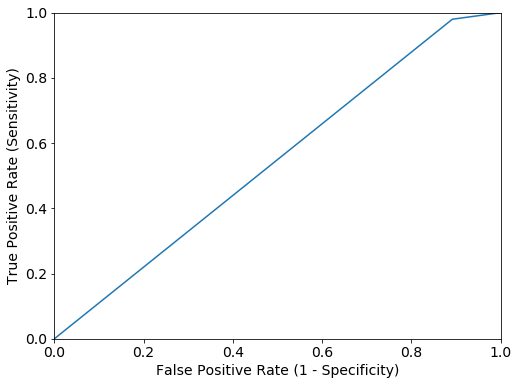

In [24]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [25]:
# calculate AUC
AUC_LR2= metrics.roc_auc_score(y_test, y_pred1)
print(AUC_LR2)

0.544085135245


# Al comparar los dos modelos desarrollados se evidencia lo siguiente:

In [26]:
print("Comparativo de modelos")
print()
print("Medidas de rendimiento Modelo 1 - LR1: Accuracy: ", acc_LR1 , "  AUC: ", AUC_LR1)
print()
print("Medidas de rendimiento Modelo 2 - LR2: Accuracy: ", acc_LR2 , "  AUC: ", AUC_LR2)

Comparativo de modelos

Medidas de rendimiento Modelo 1 - LR1: Accuracy:  0.767589627028   AUC:  0.54781298704

Medidas de rendimiento Modelo 2 - LR2: Accuracy:  0.767951234632   AUC:  0.544085135245
